In [1]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1

#### Preprocessing

In [2]:
word_index = imdb.get_word_index()
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

In [3]:
inv_word_index = {v: k for k, v in word_index.items()}

In [4]:
print("total number of words: ", len(inv_word_index))
flat_list_train = [item for sublist in train_data for item in sublist]
flat_list_test = [item for sublist in test_data for item in sublist]
print("used number of words: ", len(set(flat_list_train + flat_list_test)))

total number of words:  88584
used number of words:  9998


In [5]:
decoded_review = list(map(lambda x: inv_word_index.get(x - 3, "?"), train_data[0]))
print(" ".join(decoded_review))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
def vectorize_sequences(sequences, dimensions=10_000):
    results = np.zeros((len(sequences), dimensions))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Model specification

In [8]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(10_000,)),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

#### Model compliation

In [9]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#### Model training

In [10]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]

y_val = train_labels[:10_000]
partial_y_train = train_labels[10_000:]

In [11]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5173 - accuracy: 0.7741 - val_loss: 0.3773 - val_accuracy: 0.8755
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3030 - accuracy: 0.9005 - val_loss: 0.3016 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2224 - accuracy: 0.9255 - val_loss: 0.2909 - val_accuracy: 0.8836
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1716 - accuracy: 0.9472 - val_loss: 0.2761 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1391 - accuracy: 0.9550 - val_loss: 0.2843 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1126 - accuracy: 0.9650 - val_loss: 0.3095 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0928 - accuracy: 0.9734 - val_loss: 0.3205 - val_accuracy: 0.8831
Epoch 8/20
30/30 [

#### Evaluation

In [12]:
history.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 30}

In [14]:
history.history

{'loss': [0.5172906517982483,
  0.30298495292663574,
  0.22235357761383057,
  0.17164862155914307,
  0.13906893134117126,
  0.11255770921707153,
  0.09275643527507782,
  0.07977026700973511,
  0.0626542866230011,
  0.052598267793655396,
  0.044094186276197433,
  0.0363662987947464,
  0.023450417444109917,
  0.026944439858198166,
  0.0157463401556015,
  0.01788734830915928,
  0.00823533907532692,
  0.010714181698858738,
  0.0062898751348257065,
  0.004220180679112673],
 'accuracy': [0.7741333246231079,
  0.9004666805267334,
  0.9255333542823792,
  0.9472000002861023,
  0.9549999833106995,
  0.9649999737739563,
  0.9733999967575073,
  0.9761333465576172,
  0.984000027179718,
  0.9873999953269958,
  0.9895333051681519,
  0.9908666610717773,
  0.996399998664856,
  0.993399977684021,
  0.9982666373252869,
  0.996399998664856,
  0.9995999932289124,
  0.9983333349227905,
  0.9992666840553284,
  0.9998000264167786],
 'val_loss': [0.37734726071357727,
  0.30158960819244385,
  0.2908532321453094

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


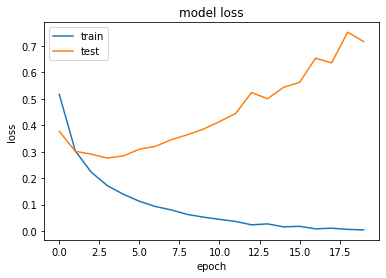

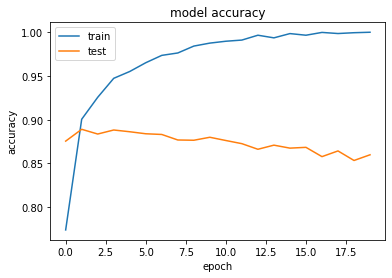

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
# summarize history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [16]:
results = model.evaluate(x_test, test_labels)

782/782 [==============================] - 1s 1ms/step - loss: 0.7988 - accuracy: 0.8449


In [17]:
for m, v in zip(model.metrics_names, results):
    print(f"{m}: {v}")

loss: 0.7988464832305908
accuracy: 0.8449199795722961


#### Prediction

In [18]:
model.predict(x_test[:10])

array([[1.8225312e-03],
       [9.9999946e-01],
       [8.2567918e-01],
       [9.4298851e-01],
       [9.8080510e-01],
       [9.9830711e-01],
       [2.9062989e-01],
       [3.1680734e-06],
       [9.5889300e-01],
       [9.9999940e-01]], dtype=float32)

## Exercise 2

#### Multiple models

In [19]:
original_model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(10_000,)),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
original_model.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

#### Smaller model

In [20]:
smaller_model = keras.Sequential(
    [
        layers.Dense(4, activation="relu", input_shape=(10_000,)),
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
smaller_model.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

In [21]:
original_history = original_model.fit(
    partial_x_train,
    partial_y_train,
    verbose=0,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)
smaller_history = smaller_model.fit(
    partial_x_train,
    partial_y_train,
    verbose=0,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

In [22]:
def plot_training_losses(losses):
    for loss in losses:
        plt.plot(loss)
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend([loss.name for loss in losses], loc="upper left")
    plt.show()

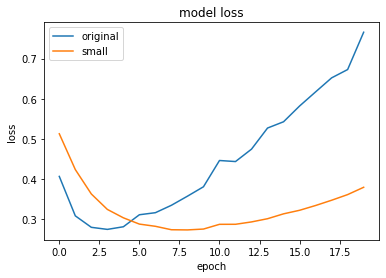

In [23]:
losses = [
    pd.Series(original_history.history["val_loss"], name="original"),
    pd.Series(smaller_history.history["val_loss"], name="small"),
]
plot_training_losses(losses)

#### Bigger model

In [24]:
bigger_model = keras.Sequential(
    [
        layers.Dense(512, activation="relu", input_shape=(10_000,)),
        layers.Dense(512, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
bigger_model.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

In [25]:
bigger_history = bigger_model.fit(
    partial_x_train,
    partial_y_train,
    verbose=0,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

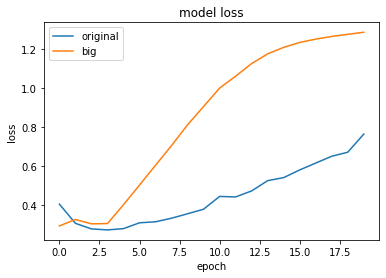

In [26]:
losses = [
    pd.Series(original_history.history["val_loss"], name="original"),
    pd.Series(bigger_history.history["val_loss"], name="big"),
]
plot_training_losses(losses)

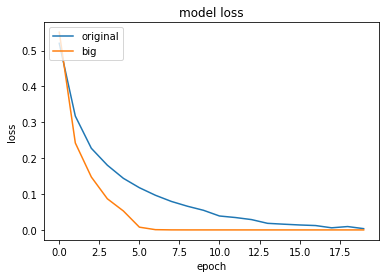

In [27]:
losses = [
    pd.Series(original_history.history["loss"], name="original"),
    pd.Series(bigger_history.history["loss"], name="big"),
]
plot_training_losses(losses)

#### L2 regularized model

In [28]:
l2_model = keras.Sequential(
    [
        layers.Dense(
            16,
            activation="relu",
            input_shape=(10_000,),
            kernel_regularizer=regularizers.l2(0.001),
        ),
        layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1, activation="sigmoid"),
    ]
)
l2_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [29]:
l2_history = l2_model.fit(
    partial_x_train,
    partial_y_train,
    verbose=0,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

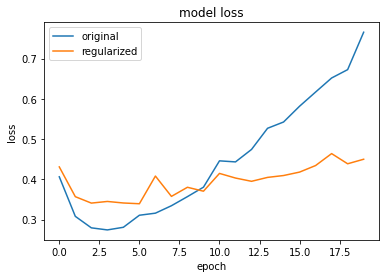

In [30]:
losses = [
    pd.Series(original_history.history["val_loss"], name="original"),
    pd.Series(l2_history.history["val_loss"], name="regularized"),
]
plot_training_losses(losses)

In [31]:
dpt_model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(10_000,)),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)
dpt_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#### Dropout model

In [32]:
dpt_history = dpt_model.fit(
    partial_x_train,
    partial_y_train,
    verbose=0,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

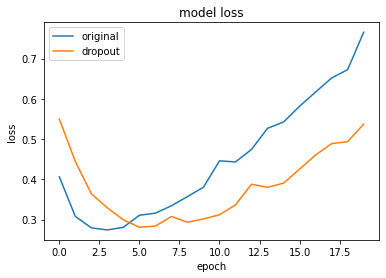

In [33]:
losses = [
    pd.Series(original_history.history["val_loss"], name="original"),
    pd.Series(dpt_history.history["val_loss"], name="dropout"),
]
plot_training_losses(losses)

#### Dropout + early stopping model

In [34]:
dpt_model_early = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(10_000,)),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)
dpt_model_early.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

In [35]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=2, restore_best_weights=True
)
dpt_early_history = dpt_model_early.fit(
    partial_x_train,
    partial_y_train,
    verbose=0,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[callback],
)

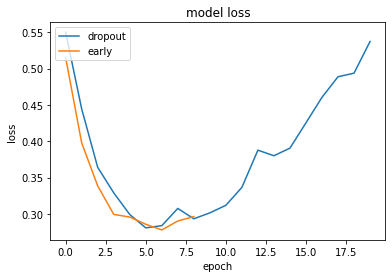

In [36]:
losses = [
    pd.Series(dpt_history.history["val_loss"], name="dropout"),
    pd.Series(dpt_early_history.history["val_loss"], name="early"),
]
plot_training_losses(losses)

## Exercise 4

#### Function and gradient

In [37]:
lam1 = 1
lam2 = 10


def make_function(lam1, lam2):
    def inner_function(p):
        return lam1 * p[0] ** 2 / 2 + lam2 * p[1] ** 2 / 2

    return inner_function


func = make_function(lam1=1, lam2=10)


def make_gradient(lam1, lam2):
    def inner_function(p):
        return np.array([lam1 * p[0], lam2 * p[1]])

    return inner_function


grad = make_gradient(lam1=1, lam2=10)

#### Contour plot

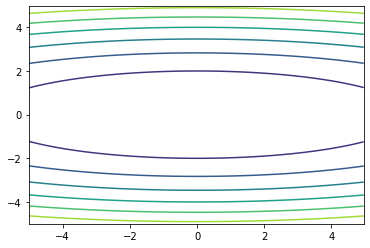

In [38]:
def get_plot_data():
    x_grid, y_grid = np.mgrid[-5 : 5 : 1 / 25, -5 : 5 : 1 / 25]
    x_pos = x_grid.ravel()
    y_pos = y_grid.ravel()
    return pd.DataFrame(data=np.array([x_pos, y_pos]).T, columns=["x1", "x2"])


def make_contours():
    grid = get_plot_data()
    grid["y"] = grid.apply(func, axis=1, raw=True)
    plt.contour(
        grid.x1.values.reshape(-1, 250),
        grid.x2.values.reshape(-1, 250),
        grid.y.values.reshape(-1, 250),
    )


make_contours()

#### Slow vs. fast learning rate

In [39]:
def gradient_descent_optimizer(x0, max_steps, lrate):
    point = x0
    points = [point]
    for i in range(max_steps):
        old = point
        point = point - lrate * grad(point)
        points.append(point)
    return points

In [40]:
start_value = np.array([4, 4])
hist_slow = gradient_descent_optimizer(start_value, 10, 0.05)
hist_fast = gradient_descent_optimizer(start_value, 10, 0.15)

df_slow = pd.DataFrame(hist_slow)
df_slow.name = "slow"

df_fast = pd.DataFrame(hist_fast)
df_fast.name = "fast"

histories = [df_slow, df_fast]

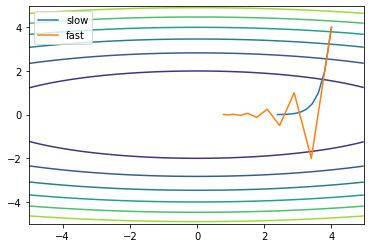

In [41]:
def plot_histories(histories):
    make_contours()
    for hist in histories:
        plt.plot(hist.iloc[:, 0], hist.iloc[:, 1], label=hist.name)
    plt.legend()


plot_histories(histories)

#### Maximum learning rate

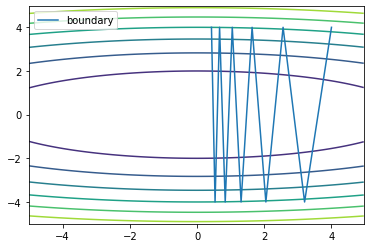

In [42]:
max_learning_rate = 2 / max(lam1, lam2)
df_boundary = pd.DataFrame(
    gradient_descent_optimizer(start_value, 10, max_learning_rate)
)
df_boundary.name = "boundary"

plot_histories([df_boundary])

#### Higher condition number

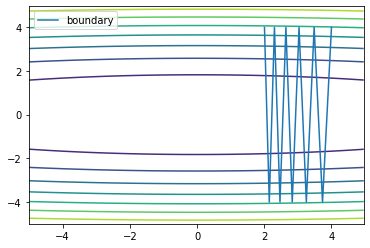

In [43]:
func = make_function(1, 30)
grad = make_gradient(1, 30)

max_learning_rate = 2 / 30

df_boundary = pd.DataFrame(
    gradient_descent_optimizer(start_value, 10, max_learning_rate)
)
df_boundary.name = "boundary"

plot_histories([df_boundary])

#### Momentum optimizer

In [44]:
def momentum_optimizer(x0, max_steps, lrate, momentum):
    velocity = np.zeros(2)
    point = x0
    points = [point]
    for i in range(max_steps):
        old = point
        velocity = momentum * velocity - lrate * grad(point)
        point = point + velocity
        points.append(point)
    return points

In [45]:
momentum = 0.5
df_momentum = pd.DataFrame(
    momentum_optimizer(start_value, 10, max_learning_rate, momentum)
)
df_momentum.name = "momentum"

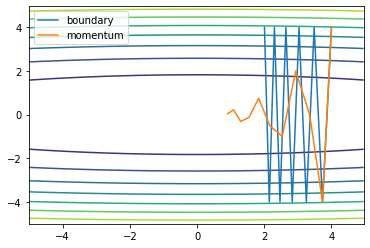

In [46]:
plot_histories([df_boundary, df_momentum])